In [150]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
import numpy as np

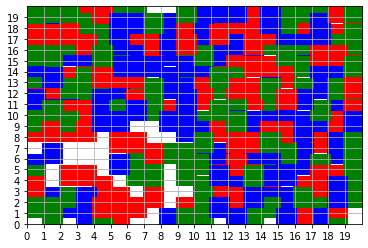

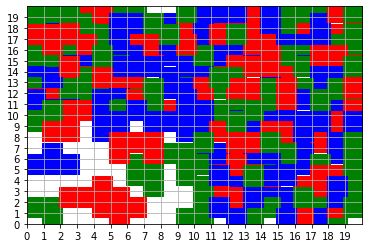

Number of iterations: 4


In [487]:
class Schelling:
    
    
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races): # this is the constructor method, add all the arguments of this method as specified in the instructions
        # add attributes here:
        self.width=width
        self.height=height
        self.empty_ratio=empty_ratio
        self.similarity_threshold=similarity_threshold
        self.n_iterations=n_iterations
        self.races=races
        
    # Write a method called populate which can be used to create an initial distribution of people in the grid.
    def populate(self):
    
        # create new attribute  self.empty_houses as an empty list, self.agents as an empty dictionary.
        self.empty_houses=[]
        self.agents={}
        # create a new attribute self.all_houses as a list of all houses
        self.all_houses=list(itertools.product(range(self.width), range(self.height)))
        # the method randomises the allocation of houses
        random.shuffle(self.all_houses)
        #the method creates a new attribute self.n_empty which is derived as the number of the empty houses (this is calculated by using the self.empty_ratio and the number of houses in the city ) 
        self.n_empty= int(self.empty_ratio*len(self.all_houses))
        #the method sets the empty_houses to be the last self.n_empty houses
        self.empty_house=self.all_houses[-self.n_empty:]
        #the remaining houses are assigned to self.remaining_houses
        self.remaining_houses=self.all_houses[:-self.n_empty]
        #we use self.remaining_houses to assign races to each house, creating a variable called houses_by_races
        # Made a list of races iterated so that I can assign a value to each house
        race_list= list(range(0,int(self.races)))*(1+int(len(self.remaining_houses)/self.races))
        house_by_races= zip(self.remaining_houses,race_list)
        #we fill the dictionary self.agents with the house_by_race in which each agent lives (hint: use zip and the update method for dictionaries.
        self.agents.update(house_by_races)
        #print (self.agents)
    #Write a method called is_unsatisfied which evaluates if a specific cell in the grid is satisfied with the location or not.
    def is_unsatisfied(self,a,b):
        l1=[(-1,-1),(-1,0),(-1,+1),(0,+1),(0,+1),(+1,-1),(+1,0),(+1,+1)] #this added to the selected house's coordinates (a,b) gives the coordinates of all of the surrounding houses
        same_race=0
        different_race=0
        for x,y in l1:
            x=x+a
            y=y+b 
            if (x,y) in self.remaining_houses:#check if empty
                if self.agents[(x,y)]==self.agents[(a,b)]:
                    same_race=same_race+1 #count this house as a house of the same race
                else:
                    different_race=different_race+1
                    
        if same_race+different_race!=0:
            if same_race/(same_race+different_race)>= self.similarity_threshold:
                return False
            if same_race/(same_race+different_race)<self.similarity_threshold:
                return True
        else:
            return True
    #D. Write a method called update which checks each cell in the grid, verifies if it is satisfied or not, and if not it moves it to a random empty cell.
    #This method checks if each agent is unsatisfied, and in that case, it fills a randomly chosen empty house with it. Important: remember to remove the location of the emptied house from self.agents and add it to self.empty_houses!
    def update(self):
        #move all unsatisfied houses into an empty house
        #make a list with all the unsatisfied houses and then run through list to assign them to empty houses
        unsatisfied_house=[]
        number_of_changes=0
        for x in range(width):
            for y in range(height):
                if (x,y) in self.remaining_houses:
                    if self.is_unsatisfied(x,y)== True:
                        random_empty_house=random.choice(self.empty_house) #choose a random empty house from list of empty houses
                        race= self.agents[(x,y)] #pick out the unsatisfied house's race
                        self.empty_house.remove(random_empty_house) #remove this random empty house from list of empty houses
                        self.empty_house.append((x,y)) #add the emptied house into empty house list
                        del self.agents[(x,y)]#delete the emptied house from list of agents
                        self.remaining_houses.remove((x,y))
                        self.remaining_houses.append(random_empty_house) #add the empty house with the new person into agent list with their race
                        self.agents[random_empty_house]=race
                        #reassign unsatisfied house to random empty house and assign the same race to the new location in agent dictionary
                        #remove the emptied house from list of agents and add it to the empty house list
                        number_of_changes=number_of_changes+1
        return number_of_changes

                    
    #E. Write a method called plot_city which plots the city 
    #with all the empty and occupied houses with the right colours.
    #The method plot_city sets up the parameters for the graph, 
    #and spits out fig and ax objects (matplotlib). 
    #Notice that we need to set xticks and yticks of the grid, and the grid itself
    #The grid should have the dimension indicated by width and height attributes. 
    #Consider a scatter plot with square markers (also important to determine the right size for them)
    def plot_city(self):
        agent_colour={1:'b',2:'r',3:'g',4:'c',5:'m',6:'y',7:'k'}
        
        for individual in self.agents:
            race=self.agents[(individual[0],individual[1])]+1
            plt.scatter(individual[0]+0.5,individual[1]+0.5, marker='s', s=max(self.width,self.height)**2,c=agent_colour[race])
        plt.xlim(0,self.width)
        plt.ylim(0,self.height)
        plt.grid()
        plt.xticks(np.arange(0,self.width))
        plt.yticks(np.arange(0,self.height))
        plt.show()
        #plt.savefig('interations'iterations))
        
###10 by 10 grid, empty house ratio=0.2, tolerance level=0.7, 10000 iterations, 2 races        
def main(): 
    Schelling_test= Schelling(20, 20, 0.2,0.4,1000,3)
    Schelling_test.populate()
    number_of_changes1 = Schelling_test.update()
    Schelling_test.plot_city()
    iterations=0
    while number_of_changes1 != 0 and iterations < Schelling_test.n_iterations:
        #print (number_of_changes1)
        number_of_changes1=Schelling_test.update()
        iterations=iterations+1
    
    Schelling_test.plot_city()
    print ('Number of iterations:',iterations)
    

    

    
if __name__=='__main__':
    main()
            
        
    
        
        

In [358]:
#test block
#initialising an object with the attributes 
Schelling_test= Schelling(10, 10, 0.1,0.4,1,2)
Schelling_test.populate()
# Schelling_test.is_unsatisfied(0,1)
Schelling_test.plot_city()


{(6, 3): 0, (5, 9): 1, (5, 0): 0, (7, 8): 1, (8, 2): 0, (6, 5): 1, (2, 9): 0, (3, 1): 1, (9, 0): 0, (4, 5): 1, (8, 9): 0, (8, 1): 1, (6, 6): 0, (1, 8): 1, (7, 7): 0, (1, 6): 1, (0, 0): 0, (8, 8): 1, (3, 2): 0, (0, 6): 1, (8, 4): 0, (9, 6): 1, (2, 7): 0, (3, 3): 1, (7, 6): 0, (2, 0): 1, (1, 4): 0, (9, 1): 1, (9, 4): 0, (5, 3): 1, (4, 2): 0, (5, 6): 1, (0, 5): 0, (7, 0): 1, (7, 1): 0, (6, 1): 1, (4, 7): 0, (9, 5): 1, (1, 0): 0, (9, 3): 1, (3, 7): 0, (4, 0): 1, (4, 9): 0, (3, 5): 1, (8, 3): 0, (0, 1): 1, (6, 2): 0, (3, 6): 1, (1, 2): 0, (8, 7): 1, (6, 0): 0, (5, 7): 1, (1, 9): 0, (4, 4): 1, (7, 3): 0, (5, 4): 1, (2, 2): 0, (8, 0): 1, (6, 9): 0, (0, 4): 1, (8, 5): 0, (4, 8): 1, (2, 1): 0, (7, 2): 1, (2, 3): 0, (5, 5): 1, (9, 8): 0, (9, 2): 1, (1, 5): 0, (0, 7): 1, (5, 8): 0, (0, 2): 1, (3, 9): 0, (3, 0): 1, (3, 8): 0, (1, 1): 1, (2, 4): 0, (0, 9): 1, (4, 3): 0, (5, 1): 1, (7, 9): 0, (9, 9): 1, (8, 6): 0, (2, 8): 1, (1, 7): 0, (4, 1): 1, (2, 6): 0, (6, 7): 1, (2, 5): 0, (9, 7): 1}


KeyError: (3, 4)

In [479]:
def plot_city(w, h):
    plt.plot(w,h)
    

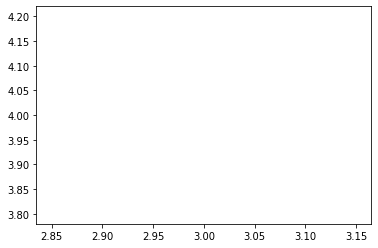

In [480]:
x=3
y=4
plt.plot(x,y)
plt.show()

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)] 
 [(9, 7), (9, 8), (9, 9)] 
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (

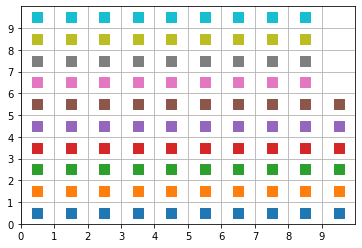

In [481]:
import itertools
agent={}
width=10
height=10
empty=3
race=2
all_houses=list(itertools.product(range(width), range(height)))
empty_houses=all_houses[-empty:]

rest_of_houses=all_houses[:-empty]
print (all_houses,'\n', empty_houses,'\n',rest_of_houses)
print (len(rest_of_houses))
a=list(range(0,int(race)))*int(len(rest_of_houses)/race)
house_by_races=zip(rest_of_houses,a)
agent.update(house_by_races)
agent

for individual in agent:
    plt.scatter(individual[0]+0.5,individual[1]+0.5, marker='s',s=max(width,height)**2,linestyle='-')
    
plt.xlim(0,width)
plt.ylim(0,height)
plt.grid()
plt.xticks(np.arange(0,int(width)))
plt.yticks(np.arange(0,int(height)))
plt.show()
    
